In [2]:
# Import the libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
# Read in the Data
df = pd.read_csv(r"C:\Users\hp\Downloads\Movies.csv")

In [4]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
# Check for missing data

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print(col, "-", percent_missing,"%")

name - 0.0 %
rating - 0.010041731872717789 %
genre - 0.0 %
year - 0.0 %
released - 0.0002608242044861763 %
score - 0.0003912363067292645 %
votes - 0.0003912363067292645 %
director - 0.0 %
writer - 0.0003912363067292645 %
star - 0.00013041210224308815 %
country - 0.0003912363067292645 %
budget - 0.2831246739697444 %
gross - 0.02464788732394366 %
company - 0.002217005738132499 %
runtime - 0.0005216484089723526 %


In [6]:
# Count missing values in each column
missing_data = df.isnull()
missing_data.head()

for col in missing_data.columns.values.tolist():
    print(col)
    print (missing_data[col].value_counts())
    print("") 

name
False    7668
Name: name, dtype: int64

rating
False    7591
True       77
Name: rating, dtype: int64

genre
False    7668
Name: genre, dtype: int64

year
False    7668
Name: year, dtype: int64

released
False    7666
True        2
Name: released, dtype: int64

score
False    7665
True        3
Name: score, dtype: int64

votes
False    7665
True        3
Name: votes, dtype: int64

director
False    7668
Name: director, dtype: int64

writer
False    7665
True        3
Name: writer, dtype: int64

star
False    7667
True        1
Name: star, dtype: int64

country
False    7665
True        3
Name: country, dtype: int64

budget
False    5497
True     2171
Name: budget, dtype: int64

gross
False    7479
True      189
Name: gross, dtype: int64

company
False    7651
True       17
Name: company, dtype: int64

runtime
False    7664
True        4
Name: runtime, dtype: int64



In [ ]:
'''
Summary for above
Total rows = 7668,
No. of columns with missing data = 11

"rating" - 77 missing data
"released" - 2 missing data
"score" - 3 missing data
"votes" - 3 missing data
"writer" - 3 missing data
"star" - 1 missing data
"country" - 3 missing data
"budget" - 2171 missing data
"gross" - 189 missing data
"company" - 17 missing data
"runtime" - 4 missing data

Replace by Mean
"score"
"votes"
"budget"
"gross"
"runtime"

Replace by Freq
"rating"
"country"

Drop the Whole Row
"released"
"writer"
"star"
"company"

'''

In [7]:
# Calculate the mean value for the "score" column
avg_score = df["score"].astype("float").mean(axis=0)
print("Average of Score:", avg_score)

Average of Score: 6.390410958904098


In [8]:
# Replace "NaN" with mean value in "score" column
df["score"].replace(np.nan, avg_score, inplace=True)

In [9]:
# Similarly Calculate Mean and Replcae for cols "votes", "budget", "gross", "runtime"
avg_votes = df["votes"].astype("float").mean(axis=0)
print("Average of Votes:", avg_votes)
df["votes"].replace(np.nan, avg_votes, inplace=True)

avg_budget = df["budget"].astype("float").mean(axis=0)
print("Average of Budget:", avg_budget)
df["budget"].replace(np.nan, avg_budget, inplace=True)

avg_gross = df["gross"].astype("float").mean(axis=0)
print("Average of Gross:", avg_gross)
df["gross"].replace(np.nan, avg_gross, inplace=True)

avg_runtime = df["runtime"].astype("float").mean(axis=0)
print("Average of Runtime:", avg_runtime)
df["runtime"].replace(np.nan, avg_runtime, inplace=True)

Average of Votes: 88108.50476190477
Average of Budget: 35589876.192650534
Average of Gross: 78500541.01778312
Average of Runtime: 107.2616127348643


In [10]:
# Calculate the most common type of "rating"
df['rating'].value_counts().idxmax()

'R'

In [11]:
#replace the missing "rating" values by the most frequent 
df["rating"].replace(np.nan, "R", inplace=True)

In [12]:
# Similarly perform for cols "country"
freq_country = df["country"].value_counts().idxmax()
df["country"].replace(np.nan, freq_country, inplace=True)

In [13]:
# Simply drop whole rows with NaN in "released", "writer", "star", "company" column
df.dropna(subset=["released", "writer", "star", "company"], axis=0, inplace=True)

In [14]:
# Reset index
df.reset_index(drop=True, inplace=True)

In [15]:
# Again Check for missing data

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print(col, "-", percent_missing,"%")

name - 0.0 %
rating - 0.0 %
genre - 0.0 %
year - 0.0 %
released - 0.0 %
score - 0.0 %
votes - 0.0 %
director - 0.0 %
writer - 0.0 %
star - 0.0 %
country - 0.0 %
budget - 0.0 %
gross - 0.0 %
company - 0.0 %
runtime - 0.0 %


In [16]:
# Check for data format
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [17]:
# Change data types of columns
df[["votes","budget","gross","runtime"]] = df[["votes","budget","gross","runtime"]].astype("int64")

In [18]:
# Limit decimals for columns
df = df.round(decimals=1)

In [19]:
# Sort DataFrame by column gross
df.sort_values(by = ["gross"], inplace = False, ascending = False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5433,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7430,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3033,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6648,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7229,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


In [20]:
# Display all rows
pd.set_option('display.max_rows', None)

In [21]:
# Check for duplicate rows
duplicate = df[df.duplicated()] 
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


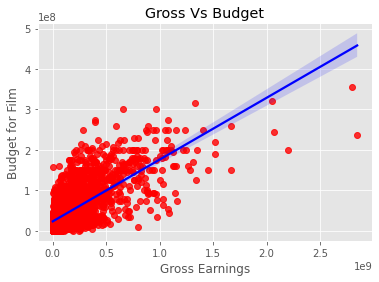

In [22]:
# Regplot gross vs budget using seaborn
sns.regplot(x = "gross", y = "budget", data = df, scatter_kws = {"color":"red"}, line_kws = {"color":"blue"})

plt.title("Gross Vs Budget")
plt.xlabel("Gross Earnings")
plt.ylabel("Budget for Film")

plt.show()

In [23]:
# Correlation between columns
# By default method is pearson 
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.097774,0.222917,0.266389,0.252128,0.119493
score,0.097774,1.000000,0.409489,0.064286,0.182907,0.399941
votes,0.222917,0.409489,1.000000,0.420983,0.628747,0.308943
budget,0.266389,0.064286,0.420983,1.000000,0.711636,0.265123
gross,0.252128,0.182907,0.628747,0.711636,1.000000,0.241344
runtime,0.119493,0.399941,0.308943,0.265123,0.241344,1.000000


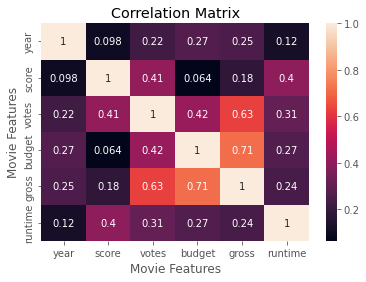

In [24]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

plt.title("Correlation Matrix")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show()

In [25]:
# Assigning unique numeric value to each column having dtype as object
df_num = df.copy()
for col_name in df_num.columns:
    if(df_num[col_name].dtype == "object"):
        df_num[col_name] = df_num[col_name].astype("category")
        df_num[col_name] = df_num[col_name].cat.codes
df_num.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6570,6,6,1980,1702,8.4,927000,2580,4003,1042,54,19000000,46998772,2315,146
1,5559,6,1,1980,1489,5.8,65000,2262,1629,326,55,4500000,58853106,727,104
2,5130,4,0,1980,1768,8.7,1200000,1109,2559,1738,55,18000000,538375067,1536,124
3,285,4,4,1980,1489,7.7,221000,1297,1995,2239,55,3500000,83453539,1808,88
4,1026,6,4,1980,1540,7.3,108000,1052,518,409,55,6000000,39846344,1773,98


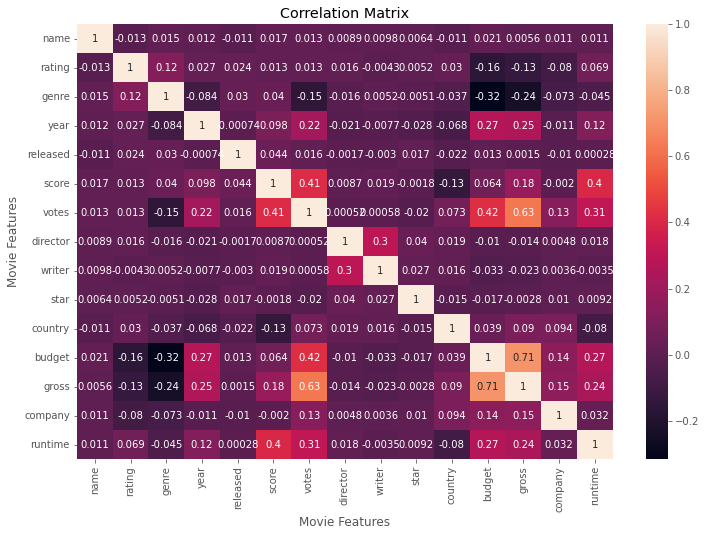

In [68]:
new_corr_matrix = df_num.corr()
sns.heatmap(new_corr_matrix, annot = True)

plt.title("Correlation Matrix")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show()

In [26]:
# Data Exploration
# Looking at the top 10 compaies by gross revenue
CompanyGrossSum = df.groupby('company')[["gross"]].sum()
CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:10]
CompanyGrossSumSorted

,gross
company,
Warner Bros.,56569922347
Universal Pictures,52592689431
Columbia Pictures,43008941346
Paramount Pictures,40572107956
Twentieth Century Fox,40257053857
Walt Disney Pictures,36327887792
New Line Cinema,19883797684
Marvel Studios,15065592411
DreamWorks Animation,11873612858


In [27]:
# Data Exploration
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()
CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:10]
CompanyGrossSumSorted

gross
company               year            
Walt Disney Pictures  2019  5773131804
Marvel Studios        2018  4018631866
Universal Pictures    2015  3834354888
Twentieth Century Fox 2009  3793491246
Walt Disney Pictures  2017  3789382071
Paramount Pictures    2011  3565705182
Warner Bros.          2010  3300479986
                      2011  3223799224
Walt Disney Pictures  2010  3104474158
Paramount Pictures    2014  3071298586